# $z$-test: total goals scored

date
: 2021-04-15

In [1]:
from src.data import Load
from statsmodels.stats.weightstats import ztest
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# load the sample
sample = Load.total_goals_scored()

## Summary

The purpose of this report was to compare the mean number of goals scored per game by the home team in the 2018/19 EPL season with that of the same metric for 2017/18.
Data on the full results of all 380 games of the 2017/18 and 2018/19 season was obtained and analysed using a standard hypothesis test.
We found no statistical evidence that expected number of goals scored per game by the home team in 2018/19 was different to that in 2017/18.

## Introduction

Sports authorities are often interested in how the sports events they oversee change over time.
One metric of particular interest is the expected number of goals by the home team in an English Premier League game.
The issue of interest in this report is whether there is a statistical difference betwee the expected number of goals scored per game by the home team in the 2018/19 season and the 2017/18 season.
The data used for this analysis was taken from **Reference**.

## Method

The data contains the full results for both the 2017/18 and 2018/19 seasons.
As the data is not normally distributed, a 95% $z$-interval was calculated for each of the seasons and a $z$-test was carried out to test the null hypothesis that expected number of goals scored per game by the home team is equal.
All analyses was carried out using **Python** (see Appendix I forthe scripts run).

## Results

A side-by-side bar chart of number of goal scored per game by the home team in the 17/18 and 18/19 seasons is plotted below.

In [3]:
plt_data = sample.melt(
    value_vars=["FTHG_2017", "FTHG_2018"]
)

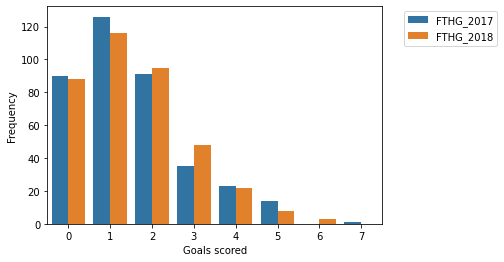

In [4]:
ax = sns.countplot(data=plt_data, x="value", hue="variable")
ax.set(xlabel="Goals scored", ylabel="Frequency")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

The mean number of goals scored by the home team in the 2018/19 season was approximately 1.57, with 95% $z$-interval (1.44, 1.70).
And the mean number of goals scored by the home team in the 2017/18 season was approximately 1.53, with 95% $z$-interval (1.40, 1.66).
A $z$-test of the hypothesis that the mean number of goals scored by the home team per game in the 2018/19 season is equal to same metric from the 2017/18 season gave $z \simeq$ 0.5470 with $p$-value of 0.5843.

## Discussion

With a $p$-value > 0.1, we conclude that there is little to no evidence against the null hypothesis that the expected number of goals scored by the home team in the 2017/18 and 2018/19 are equal.

## Appendix I: Calculations

This section contains the **Python** used to write the report.

In [5]:
# summary table
sample.describe().T

,count,mean,std,min,25%,50%,75%,max
FTHG_2017,380.0,1.531579,1.340087,0.0,1.0,1.0,2.0,7.0
FTAG_2017,380.0,1.147368,1.177793,0.0,0.0,1.0,2.0,6.0
FTHG_2018,380.0,1.568421,1.312836,0.0,1.0,1.0,2.0,6.0
FTAG_2018,380.0,1.252632,1.180031,0.0,0.0,1.0,2.0,6.0


In [6]:
# declare sampling distribution of the mean
sampling_dist_2017 = norm(
    sample["FTHG_2017"].mean(),
    sample["FTHG_2017"].std() / (sample["FTHG_2017"].size)**0.5
)

# get ci95 17/18 season
sampling_dist_2017.interval(0.95)

(1.3968411706394648, 1.6663167240973775)

In [7]:
# declare sampling distribution of the mean
sampling_dist_2018 = norm(
    sample["FTHG_2018"].mean(),
    sample["FTHG_2018"].std() / (sample["FTHG_2018"].size)**0.5
)

# get ci95 18/19 season
sampling_dist_2018.interval(0.95)

(1.4364232278920328, 1.700418877371125)

In [8]:
help(ztest)

Help on function ztest in module statsmodels.stats.weightstats:

ztest(x1, x2=None, value=0, alternative='two-sided', usevar='pooled', ddof=1.0)
    test for mean based on normal distribution, one or two samples
    
    In the case of two samples, the samples are assumed to be independent.
    
    Parameters
    ----------
    x1 : array_like, 1-D or 2-D
        first of the two independent samples
    x2 : array_like, 1-D or 2-D
        second of the two independent samples
    value : float
        In the one sample case, value is the mean of x1 under the Null
        hypothesis.
        In the two sample case, value is the difference between mean of x1 and
        mean of x2 under the Null hypothesis. The test statistic is
        `x1_mean - x2_mean - value`.
    alternative : str
        The alternative hypothesis, H1, has to be one of the following
    
           'two-sided': H1: difference in means not equal to value (default)
           'larger' :   H1: difference in means la

In [9]:
# z-test - returns (z, p)
ztest(x1=sample["FTHG_2018"], value=sample["FTHG_2017"].mean())

(0.5470484045695729, 0.5843454777877707)